# Graduate Project: Global Salary and Work Trends in the Data-Related Field
---
### Dataset Source
The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets), and originally collected from [AIJobs.net](https://aijobs.net./), contains global salary information for data science roles from 2020 to 2023. It includes 3,756 records and 11 columns, covering the following key fields:
- **Job-related Information**：`job_title`, `experience_level`, `employment_type`, `remote_ratio`
- **Salary Information**：`salary`, `salary_currency`, `salary_in_usd`
- **Company Information**：`company_size`, `company_location`, `employee_residence`
- **Other**：`work_year`

---

### Analysis Objectives and Key Questions

This project aims to explore salary trends and work patterns within the data science field, focusing on the following key areas:

- Regional variations and changes in salary distribution
- The influence of job titles and experience levels on compensation
- The relationship between remote work prevalence and salary levels
- The impact of company size on compensation
- The extent and frequency of cross-border employment
- Workforce trends and shifts from 2020 to 2023

Through these analyses, this project seeks to gain deeper insights into the evolving data job market and uncover potential career opportunities.


### Required Packages and Installation
This project uses the following Python packages for data processing and visualization:
- `pandas`: for data cleaning and analysis

- `matplotlib`: for basic data visualization

- `seaborn`: for statistical-style visualizations

Run this command below in your notebook if the required packages are not already installed: 
```python
!pip install pandas matplotlib seaborn
```

## Data loading and preliminary checking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ds_salaries.csv')
print(df.shape)
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Data Cleaning

### - Remove unnecessary columns (`salary` and `salary_currency`) and rearrange the remaining columns.
* Reason: The dataset already includes a column named `salary_in_usd`, which represents salaries converted into USD. Therefore, the original `salary` and `salary_currency` columns are redundant and no longer needed.

In [2]:
# Remove the columns 'salary_currency' and 'salary'
df.drop(columns=['salary_currency', 'salary'], inplace=True) # inplace=True : directly modifies the original DataFrame without returning a new object


# Rearrange the column order to make the data table more readable
new_order = ['work_year', 'experience_level', 'job_title', 'salary_in_usd', 'company_size', 'remote_ratio', 'employee_residence','company_location', 'employment_type']
df = df[new_order]
df.head()

,work_year,experience_level,job_title,salary_in_usd,company_size,remote_ratio,employee_residence,company_location,employment_type
0,2023,SE,Principal Data Scientist,85847,L,100,ES,ES,FT
1,2023,MI,ML Engineer,30000,S,100,US,US,CT
2,2023,MI,ML Engineer,25500,S,100,US,US,CT
3,2023,SE,Data Scientist,175000,M,100,CA,CA,FT
4,2023,SE,Data Scientist,120000,M,100,CA,CA,FT


### - Job Title Standardization
* Reason: To unify semantically equivalent job titles written in different formats

In [3]:
# Create a standardized correspondence table for job titles
title_mapping_cleaned = {
    # Data Scientist
    'Lead Data Scientist': 'Data Scientist',
    'Principal Data Scientist': 'Data Scientist',
    'Applied Data Scientist': 'Data Scientist',
    'Staff Data Scientist': 'Data Scientist',
    'Product Data Scientist': 'Data Scientist',
    'Data Scientist Lead': 'Data Scientist',
    'Data Science Lead': 'Data Scientist',
    'Director of Data Science': 'Data Scientist',
    'Head of Data Science': 'Data Scientist',
    'Data Scientist': 'Data Scientist',
    'Data Science Tech Lead': 'Data Scientist',

    # ML Engineer
    'Machine Learning Engineer': 'ML Engineer',
    'ML Engineer': 'ML Engineer',
    'Applied Machine Learning Scientist': 'ML Engineer',
    'Machine Learning Developer': 'ML Engineer',
    'Lead Machine Learning Engineer': 'ML Engineer',
    'Principal Machine Learning Engineer': 'ML Engineer',
    'Machine Learning Software Engineer': 'ML Engineer',
    'MLOps Engineer': 'ML Engineer',
    'Machine Learning Research Engineer': 'ML Engineer',
    'Machine Learning Scientist': 'ML Engineer',
    'AI Scientist': 'ML Engineer',
    'AI Developer': 'ML Engineer',
    'AI Programmer': 'ML Engineer',
    'Deep Learning Engineer': 'ML Engineer',
    'Deep Learning Researcher': 'ML Engineer',
    'Head of Machine Learning': 'ML Engineer',
    'Data Science Engineer': 'ML Engineer',
    'Applied Machine Learning Engineer': 'ML Engineer',
    'Machine Learning Infrastructure Engineer': 'ML Engineer',

    # Data Engineer
    'Data Engineer': 'Data Engineer',
    'Lead Data Engineer': 'Data Engineer',
    'Principal Data Engineer': 'Data Engineer',
    'Cloud Data Engineer': 'Data Engineer',
    'Cloud Database Engineer': 'Data Engineer',
    'ETL Developer': 'Data Engineer',
    'ETL Engineer': 'Data Engineer',
    'Software Data Engineer': 'Data Engineer',
    'Data DevOps Engineer': 'Data Engineer',
    'BI Data Engineer': 'Data Engineer',
    'Azure Data Engineer': 'Data Engineer',
    'Marketing Data Engineer': 'Data Engineer',
    'Big Data Engineer': 'Data Engineer',
    'Data Infrastructure Engineer': 'Data Engineer',
    'Platform Engineer': 'Data Engineer',
    'Analytics Engineer': 'Data Engineer',
    'Data Analytics Engineer': 'Data Engineer',

    # Data Analyst
    'Data Analyst': 'Data Analyst',
    'BI Analyst': 'Data Analyst',
    'BI Data Analyst': 'Data Analyst',
    'Business Data Analyst': 'Data Analyst',
    'Financial Data Analyst': 'Data Analyst',
    'Compliance Data Analyst': 'Data Analyst',
    'Staff Data Analyst': 'Data Analyst',
    'Marketing Data Analyst': 'Data Analyst',
    'Insight Analyst': 'Data Analyst',
    'Product Data Analyst': 'Data Analyst',
    'Power BI Developer': 'Data Analyst',
    'Finance Data Analyst': 'Data Analyst',
    'Lead Data Analyst': 'Data Analyst',
    'Principal Data Analyst': 'Data Analyst',
    'BI Developer': 'Data Analyst',
    'Business Intelligence Engineer': 'Data Analyst',
    'Data Science Manager': 'Data Analyst',
    'Data Analytics Manager': 'Data Analyst',
    'Data Analytics Lead': 'Data Analyst',
    'Manager Data Management': 'Data Analyst',
    'Data Manager': 'Data Analyst',
    'Head of Data': 'Data Analyst',
    'Machine Learning Manager': 'Data Analyst',

    # Architect
    'Data Architect': 'Data Architect',
    'Principal Data Architect': 'Data Architect',
    'Big Data Architect': 'Data Architect',
    'Cloud Data Architect': 'Data Architect',

    # Data Researcher
    'Research Scientist': 'Data Researcher',
    'Applied Scientist': 'Data Researcher',
    'Machine Learning Researcher': 'Data Researcher',
    '3D Computer Vision Researcher': 'Data Researcher',
    'NLP Engineer': 'Data Researcher',
    'Computer Vision Engineer': 'Data Researcher',
    'Computer Vision Software Engineer': 'Data Researcher',
    'Research Engineer': 'Data Researcher',

    # Data Specialist
    'Data Specialist': 'Data Specialist',
    'Data Strategist': 'Data Specialist',
    'Data Lead': 'Data Specialist',
    'Data Quality Analyst': 'Data Specialist',
    'Data Science Consultant': 'Data Specialist',
    'Data Operations Analyst': 'Data Specialist',
    'Data Operations Engineer': 'Data Specialist',
    'Data Management Specialist': 'Data Specialist',
    'Data Modeler': 'Data Specialist',
    'Autonomous Vehicle Technician': 'Data Specialist',
    'Data Analytics Consultant': 'Data Specialist',
    'Data Analytics Specialist': 'Data Specialist',
}


# Standardize the original Job Title (job_title) field according to the corresponding table and convert it into the "job_title_standardized" field
df['job_title_standardized'] = df['job_title'].replace(title_mapping_cleaned)

# Adjust the column order
job_title_standardized_col = df.pop('job_title_standardized')
df.insert(loc=3, column='job_title_standardized', value=job_title_standardized_col) 
df.head(4)

,work_year,experience_level,job_title,job_title_standardized,salary_in_usd,company_size,remote_ratio,employee_residence,company_location,employment_type
0,2023,SE,Principal Data Scientist,Data Scientist,85847,L,100,ES,ES,FT
1,2023,MI,ML Engineer,ML Engineer,30000,S,100,US,US,CT
2,2023,MI,ML Engineer,ML Engineer,25500,S,100,US,US,CT
3,2023,SE,Data Scientist,Data Scientist,175000,M,100,CA,CA,FT


### Question 1: What are the percentages of each employment type?

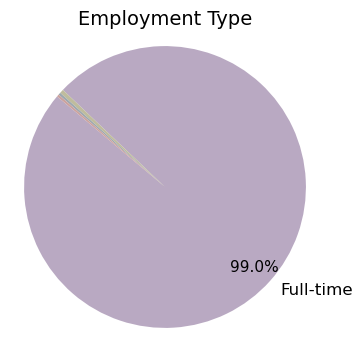

In [4]:
# Calculate the proportion of employment types
employment_ratio = df['employment_type'].value_counts(normalize=True).round(4)

# Custom Labels
label_dict = {
'FT': 'Full-time',
'PT': 'Part-time',
'CT': 'Contract employment',
'FL': 'Freelance'
}
labels = [label_dict.get(code, code) for code in employment_ratio.index]

# Create a "conditional tag": only display tags with a percentage > 1%, otherwise display an empty string
conditional_labels = [label if pct > 0.01 else '' for label, pct in zip(labels, employment_ratio)]

colors_morandi = ['#B9A9C2', '#BFBC9D', '#9DA8AF', '#CBA29E']

# Drawing
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
employment_ratio,
labels=conditional_labels,
autopct=lambda pct: f'{pct:.1f}%' if pct > 1 else '',
colors=colors_morandi,
startangle=140,
pctdistance=0.85,
labeldistance=1.1
)

# Beautify text
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(11)

plt.title('Employment Type', fontsize=14)
plt.axis('equal')
plt.show()

**Result & Insight:**
Almost all employment types are full time.

#### =>Remove `employment_type` column
* Reason: The `employment_type` column was removed since more than 99% of entries are FT(Full-time), making it uninformative for analysis.

In [5]:
df.drop(columns=['employment_type'], inplace=True)
rows, cols = df.shape
print("(rows,cols) =",str("(")+str(rows)+str(",")+str(cols)+str(")"))
df.head(3)

(rows,cols) = (3755,9)


,work_year,experience_level,job_title,job_title_standardized,salary_in_usd,company_size,remote_ratio,employee_residence,company_location
0,2023,SE,Principal Data Scientist,Data Scientist,85847,L,100,ES,ES
1,2023,MI,ML Engineer,ML Engineer,30000,S,100,US,US
2,2023,MI,ML Engineer,ML Engineer,25500,S,100,US,US


### Question 2: What is the distribution of company locations? (Only keep locations with ≥ 1%)

* Reason: Locations with less than 1% representation have too few data points to represent the overall trend.

In [6]:
# Filter data to include only company locations with ≥ 1% representation:
# step 1. Calculate the percentage distribution of company locations
country_percentage = df['company_location'].value_counts(normalize=True) * 100   # normalize=True: The output is controlled by "Ratio" instead of "Number"
# step 2: Identify countries with a proportion ≥ 1%
countries_to_keep = country_percentage[country_percentage >= 1].index
# step 3: Filter the dataset to retain only those countries
df = df[df['company_location'].isin(countries_to_keep)]


# Display the company location distribution after cleaning
new_percentage = df['company_location'].value_counts(normalize=True).mul(100).round(2)
print(new_percentage)
print()

print(f"(rows, cols) = {df.shape}")

company_location
US    87.11
GB     4.93
CA     2.49
ES     2.21
IN     1.66
DE     1.60
Name: proportion, dtype: float64

(rows, cols) = (3490, 9)


## Feature Enrichment / Data Enrichment

### - Add a new column: `cost_index` (Cost of living index) by country
* Reason: Comparing salaries across countries may be misleading due to differences in living standards and cost of goods, so the cost index is added as an adjustment factor.
* Cost of living index source: https://www.numbeo.com/cost-of-living/

In [7]:
# Cost of living index by country (base = 100 for the U.S.)
cost_index = {
    'US': 74.2,
    'CA': 68.0,
    'DE': 66.0,
    'GB': 63.6,
    'ES': 50.6,
    'IN': 24.4,
}

# Directly map cost_index into df based on company location
df['cost_index'] = df['company_location'].map(cost_index)

# Adjust the column order
cost_index_col = df.pop('cost_index')
df.insert(loc=df.columns.get_loc('salary_in_usd') + 1, column='cost_index', value=cost_index_col)

df.head(3)

,work_year,experience_level,job_title,job_title_standardized,salary_in_usd,cost_index,company_size,remote_ratio,employee_residence,company_location
0,2023,SE,Principal Data Scientist,Data Scientist,85847,50.6,L,100,ES,ES
1,2023,MI,ML Engineer,ML Engineer,30000,74.2,S,100,US,US
2,2023,MI,ML Engineer,ML Engineer,25500,74.2,S,100,US,US


## A. Data Overview

### Question 3: After data cleaning, how many rows and columns are in the dataset?

In [8]:
print(df.shape)
df.head()

(3490, 10)


,work_year,experience_level,job_title,job_title_standardized,salary_in_usd,cost_index,company_size,remote_ratio,employee_residence,company_location
0,2023,SE,Principal Data Scientist,Data Scientist,85847,50.6,L,100,ES,ES
1,2023,MI,ML Engineer,ML Engineer,30000,74.2,S,100,US,US
2,2023,MI,ML Engineer,ML Engineer,25500,74.2,S,100,US,US
3,2023,SE,Data Scientist,Data Scientist,175000,68.0,M,100,CA,CA
4,2023,SE,Data Scientist,Data Scientist,120000,68.0,M,100,CA,CA


### Question 4: What are the top 5 most common job titles?

In [9]:
# Count the frequency of each standardized job title and select the top 5
top5_counts = df['job_title_standardized'].value_counts().head(5)
top5_counts

job_title_standardized
Data Engineer      1143
Data Scientist      830
Data Analyst        768
ML Engineer         383
Data Researcher     195
Name: count, dtype: int64

## B. Salary Analysis and Distribution

### Question 5: What is the salary distribution (in USD)?

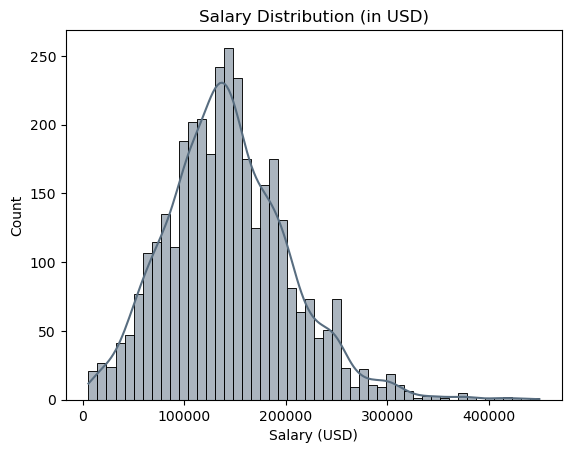

count      3490.000000
mean     143007.889971
std       60628.716841
min        5409.000000
25%      101313.500000
50%      140000.000000
75%      180000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


In [10]:
sns.histplot(df['salary_in_usd'], bins=50, kde=True, color='#586D80')
plt.title("Salary Distribution (in USD)")
plt.xlabel("Salary (USD)")
plt.show()

print(df['salary_in_usd'].describe())

**Result & Insight:**
The salary distribution is right-skewed, with most values concentrated in the low to mid salary range, while a few high-paying jobs extend the overall spread.

### Question 6: Which job titles have the highest average salary? (Top 5)

In [11]:
# Calculate the average salary for each job title and display the top 5 in descending order
top5_titles = df.groupby('job_title_standardized')['salary_in_usd'].mean().sort_values(ascending=False).head(5)

top5_titles

job_title_standardized
Data Researcher    173311.615385
Data Architect     160693.809524
ML Engineer        158855.788512
Data Scientist     148227.533735
Data Engineer      146128.227472
Name: salary_in_usd, dtype: float64

**Result & Insight:**
The highest-paying positions tend to be research-oriented, likely due to their high technical complexity, strong market demand, and talent scarcity.

### Question 7: For Data Engineers, which countries offer the top 5 highest average salaries? (Without consider the cost of living index) 
### Question 8: For Data Engineers, which countries offer the top 5 highest adjusted salaries? (Consider the cost of living index) 
- Adjusted salary = actual salary / (cost of living index / 100)

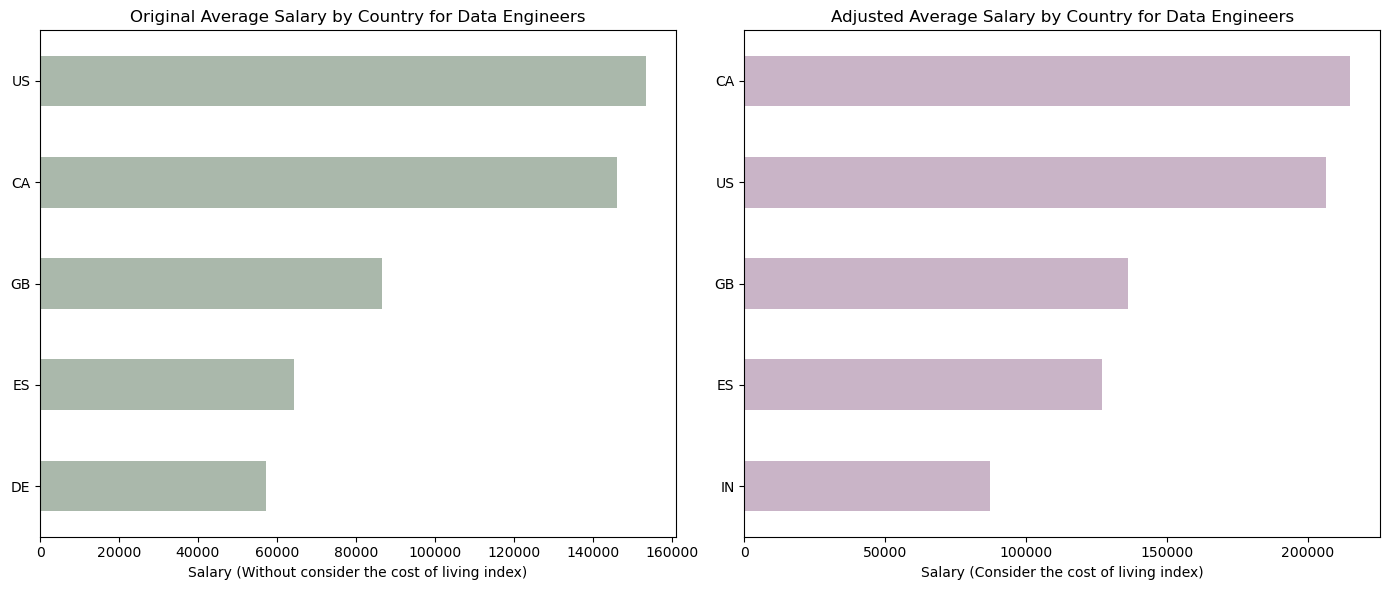

In [12]:
# Filter Data Engineers and calculate salaries adjusted by cost of living index
data_engineers = df[df['job_title_standardized'] == 'Data Engineer'].copy()
data_engineers['adjusted_salary'] = data_engineers['salary_in_usd'] / (data_engineers['cost_index'] / 100)


# Compute the top 5 highest salaries (original and adjusted), sorted in ascending order
original_salaries = (
    data_engineers.groupby('company_location')['salary_in_usd']
    .mean().nlargest(5).sort_values()
)
adjusted_salaries = (
    data_engineers.groupby('company_location')['adjusted_salary']
    .mean().nlargest(5).sort_values()
)

# Plot side-by-side horizontal bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

original_salaries.plot(kind='barh', ax=axes[0], color='#AAB8AB')
axes[0].set(title='Original Average Salary by Country for Data Engineers', xlabel='Salary (Without consider the cost of living index)', ylabel='')

adjusted_salaries.plot(kind='barh', ax=axes[1], color='#C9B4C7')
axes[1].set(title='Adjusted Average Salary by Country for Data Engineers', xlabel='Salary (Consider the cost of living index)', ylabel='')

plt.tight_layout()
plt.show()


**Result & Insight:**
Countries with the highest original salaries do not necessarily retain their advantage after adjusting for cost of living, highlighting the significant impact of living expenses on real income.

### Question 9: What are the average salary differences for Data Engineers across different experience levels?
- (EN)Entry-level
- (MI)Mid-level
- (SE)Senior-level
- (EX)Executive-level		

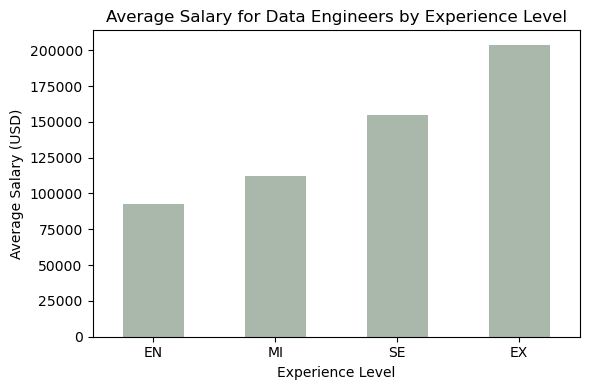

In [13]:
# Filter records for Data Engineers
data_engineer_df = df[df['job_title_standardized'] == "Data Engineer"]

# Calculate the average salary by experience level (sorted in ascending order)
avg_salary_by_experience = data_engineer_df.groupby('experience_level')['salary_in_usd'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(6, 4))
avg_salary_by_experience.plot(kind='bar', color='#AAB8AB')
plt.title('Average Salary for Data Engineers by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Result & Insight:**
The salary gap widens significantly with experience level — the average salary for Executive-level (EX) professionals is more than twice that of Entry-level (EN).

## C. The relationship between remote work and salary

### Question 10: What is the remote work ratio distribution (0%, 50%, 100%) among the top 3 highest-paying jobs?

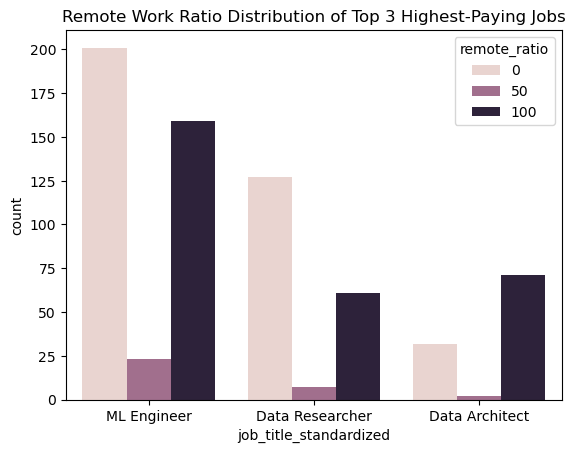

In [14]:
# Identify the top 3 highest-paying job titles
top3 = df.groupby('job_title_standardized')['salary_in_usd'].mean().sort_values(ascending=False).head(3).index

# Filter all records related to these three job titles
subset = df[df['job_title_standardized'].isin(top3)]

# Plot the distribution of remote_ratio for these job titles (distinguished by color)
sns.countplot(data=subset, x='job_title_standardized', hue='remote_ratio')
plt.title("Remote Work Ratio Distribution of Top 3 Highest-Paying Jobs")
plt.show()

**Result & Insight:**
Despite the remote-friendly nature of these high-paying roles, on-site work remains dominant—possibly due to better control over performance and security for tasks like model deployment and data processing within internal systems.

### Question 11: Among the top 3 most common jobs, what are the average salary differences between fully remote and fully on-site roles for entry-level (EN) employees? 

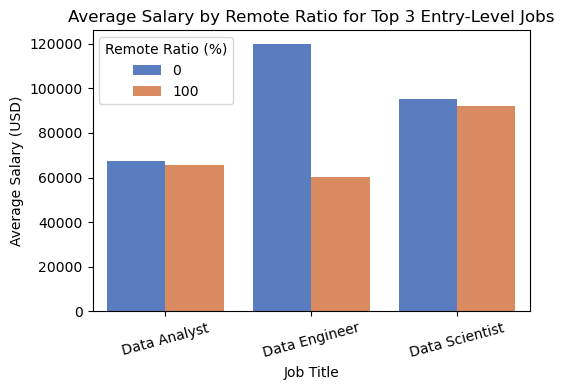

In [15]:
# Find the top 3 most common job titles
top3_jobs = df['job_title_standardized'].value_counts().head(3).index

# Filter out Entry-Level (EN) + remote_ratio = 0 or 100 + top3 job titles
filtered_df = df[
    (df['experience_level'] == 'EN') &
    (df['job_title_standardized'].isin(top3_jobs)) &
    (df['remote_ratio'].isin([0, 100]))
]

# Calculate the average salary for each position under different remote_ratio
salary_by_remote_ratio = (
    filtered_df.groupby(['job_title_standardized', 'remote_ratio'])['salary_in_usd']
    .mean()
    .unstack()[[0, 100]]  # Specify the order: 0%remote ➜ 100%remote
    .round(2)
)

# Convert data to long format (for easy group bar chart drawing)
salary_melted = salary_by_remote_ratio.reset_index().melt(
    id_vars='job_title_standardized',
    value_vars=[0, 100],
    var_name='Remote Ratio',
    value_name='Average Salary (USD)'
)


plt.figure(figsize=(5.5, 4))
sns.barplot(
    data=salary_melted,
    x='job_title_standardized',
    y='Average Salary (USD)',
    hue='Remote Ratio',
    palette='muted'
)

plt.title("Average Salary by Remote Ratio for Top 3 Entry-Level Jobs")
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=15)
plt.legend(title="Remote Ratio (%)")
plt.tight_layout()
plt.show()

**Result & Insight:**
Among EN-level employees, fully on-site jobs generally offer higher average salaries than fully remote ones. This suggests that in-person work may help early-career professionals grow and command better pay.

## D. The relationship between company size and salary

### Question 12: Among Entry-Level (EN) records, how does the distribution of job counts vary between medium-sized (M) and large-sized (L) companies across different job titles?

In [16]:
# Filter data with EN (Entry-Level) experience and keep only records from medium (M) and large (L) companies
en_df = df[(df['experience_level'] == 'EN') & (df['company_size'].isin(['M', 'L']))]

company_size_count = (
    en_df.groupby(['job_title_standardized', 'company_size'])['salary_in_usd']
    .count()
    .unstack()
)
company_size_count

company_size,L,M
job_title_standardized,,
Data Analyst,22,41
Data Engineer,15,51
Data Researcher,9,17
Data Scientist,11,26
Data Specialist,4,1
ML Engineer,11,13


**Result & Insight:**
Overall, medium-sized companies offer more entry-level data-related job opportunities, especially for roles like Data Engineer and Data Analyst.

### Question 13: At the same job and experience level (EN), what are the average salary differences between medium (M) and large (L) companies?

* Based on the previous question, I exclude "Data Specialist" from this analysis due to insufficient data (only one record under company size M).

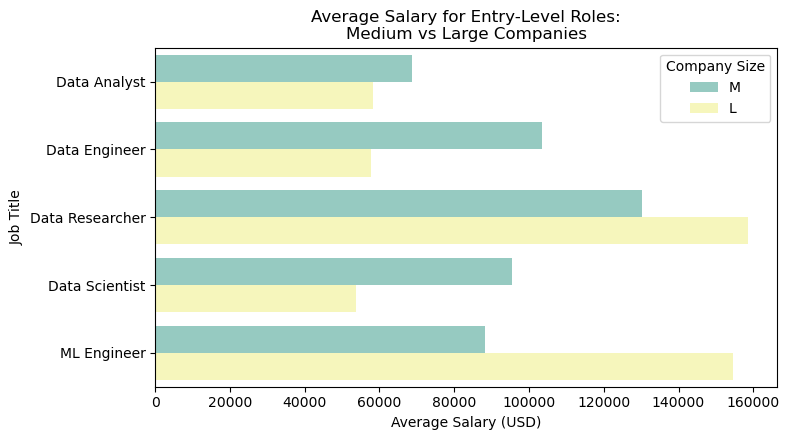

In [17]:
# Filter Entry-Level (EN) data
en_df = df[df['experience_level'] == 'EN']

# Exclude 'Data Specialist' from the analysis
filtered_en_df = en_df[en_df['job_title_standardized'] != 'Data Specialist']

# Group by job title and company size (M and L), calculate average salary
salary_by_title_size_en = (
    filtered_en_df[filtered_en_df['company_size'].isin(['M', 'L'])]
    .groupby(['job_title_standardized', 'company_size'])['salary_in_usd']
    .mean()
    .unstack()[['M', 'L']]   # Ensure column order: M → L
    .round(2)
)

# Reshape data for visualization (long format)
melted_salary = salary_by_title_size_en.reset_index().melt(
    id_vars='job_title_standardized',
    value_vars=['M', 'L'],
    var_name='Company Size',
    value_name='Average Salary (USD)'
)

# Step 5: Plot horizontal bar chart (hbar)
plt.figure(figsize=(8, 4.5))
sns.barplot(
    data=melted_salary,
    y='job_title_standardized',     # Job titles on the y-axis
    x='Average Salary (USD)',       # Average salary on the x-axis
    hue='Company Size',             # Different colors for M and L
    palette='Set3'
)

# Final touches: title, labels, legend
plt.title("Average Salary for Entry-Level Roles:\nMedium vs Large Companies")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.legend(title="Company Size")
plt.tight_layout()
plt.show()

**Result & Insight:**
At the EN level, not all job titles show a trend of higher salaries in large companies, suggesting that the nature of the role and company-specific strategies may play a more significant role in determining compensation.

### Question 14: Among different company sizes, which job have the highest average salaries (Top 5 for each size)?

In [18]:
# Create an empty dictionary to store the top 5 highest-paying job titles for each company size
top5_jobs_by_company_size = {}

# Get the unique company size categories (e.g., S, M, L)
company_sizes = df['company_size'].dropna().unique()  # .dropna() is used to remove missing values

# Process each company size separately
for size in company_sizes:
    subset = df[df['company_size'] == size]  # Filter records for the specific company size
    
    # Calculate the average salary for each job title and get the top 5
    job_salary = (
        subset.groupby('job_title_standardized')['salary_in_usd']
        .mean()
        .sort_values(ascending=False)
        .head(5)
    )
    
    # Store the result in the dictionary
    top5_jobs_by_company_size[size] = job_salary

# Display the results
for size, jobs in top5_jobs_by_company_size.items():
    print(f"\nCompany Size: {size}")
    print(jobs)


Company Size: L
job_title_standardized
Data Researcher    172692.825000
Data Architect     159345.600000
ML Engineer        149719.660714
Data Scientist     133179.237113
Data Engineer      125705.556962
Name: salary_in_usd, dtype: float64

Company Size: S
job_title_standardized
ML Engineer        103484.160000
Data Researcher     96559.444444
Data Engineer       95687.750000
Data Scientist      87302.840000
Data Specialist     71643.500000
Name: salary_in_usd, dtype: float64

Company Size: M
job_title_standardized
Data Researcher    178212.445205
ML Engineer        165133.649007
Data Architect     160835.726316
Data Scientist     152440.531073
Data Engineer      148237.235741
Name: salary_in_usd, dtype: float64


**Result & Insight:**
* Across all three company sizes, Data Researcher, ML Engineer, and Data Architect consistently dominate the top-paying positions, indicating their high technical value and market scarcity.

* Medium-sized companies (M) tend to offer higher overall average salaries—the top 5 roles in this group all earn more than their counterparts in large and small companies. This may reflect a more aggressive compensation strategy to attract top talent.

* Small companies (S) generally offer more conservative salaries.

### Question 15: What are the average salary differences for senior-level (SE) employees across different company sizes?

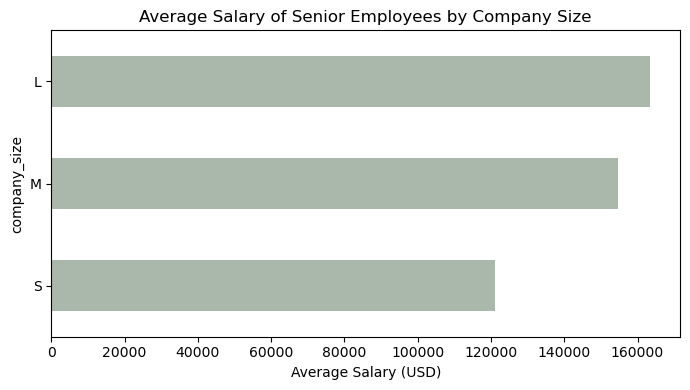

In [19]:
# Filter data for senior-level employees
senior_df = df[df['experience_level'] == 'SE']

# Calculate the average salary of senior employees by company size
senior_salary_by_size = senior_df.groupby('company_size')['salary_in_usd'].mean().round(2).sort_values(ascending=False)

# Plot the results
senior_salary_by_size.plot(kind='barh', color='#AAB8AB', figsize=(7, 4))
plt.xlabel('Average Salary (USD)')
plt.title('Average Salary of Senior Employees by Company Size')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Result & Insight:**
From the perspective of long-term career development and salary growth potential, staying with a large company (L) may be a more advantageous choice.

## E. Time-Based Trend Analysis

### Question 16: What are the salary trends for various job titles in the U.S. from 2020 to 2023?

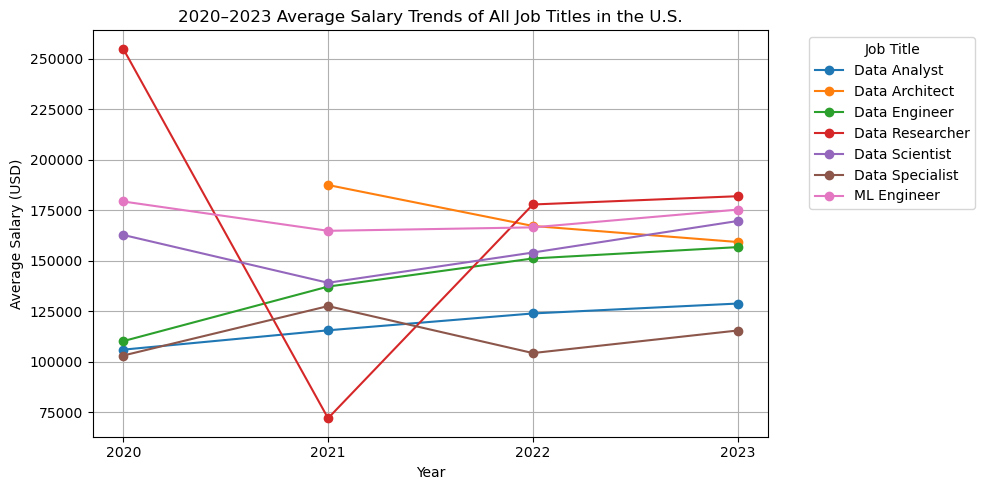

In [20]:
# Filter data for the United States
us_df = df[df['company_location'] == 'US']

# Calculate the average salary for each job title by year
us_salary_by_year = (
    us_df.groupby(['work_year', 'job_title_standardized'])['salary_in_usd']
    .mean()
    .unstack()
)

# Plot the line chart showing salary trends for all job titles
us_salary_by_year.plot(
    marker='o',
    figsize=(10, 5),
    title='2020–2023 Average Salary Trends of All Job Titles in the U.S.'
)
plt.ylabel("Average Salary (USD)")
plt.xlabel("Year")
plt.xticks(us_salary_by_year.index)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside to avoid overlap
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Check the number of Data Researcher records in the U.S. for the year 2021
count_US_DR_2021 = df[
    (df['company_location'] == 'US') &
    (df['work_year'] == 2021) &
    (df['job_title_standardized'] == 'Data Researcher')
].shape[0]

print("Number of Data Researcher records in the U.S. in 2021:", count_US_DR_2021)

Number of Data Researcher records in the U.S. in 2021: 3


**Result & Insight:**
* Data Researcher saw a sharp decline in 2021, likely due to insufficient sample size (only 3 records).
* Excluding Data Researcher, the salary trends for other job titles from 2020 to 2023 remained relatively stable, suggesting that these roles offer consistency and predictability in the U.S. job market.

### Question 17: How did the proportion of fully remote work (remote_ratio = 100) change from 2020 to 2023?

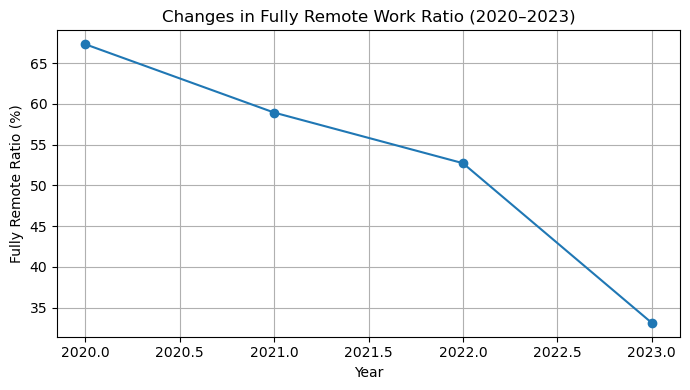

In [22]:
# Calculate the percentage of fully remote work (remote_ratio == 100) by year
full_remote_ratio_by_year = (
    df[df['remote_ratio'] == 100]
    .groupby('work_year')
    .size()
    .div(df.groupby('work_year').size()) * 100
).round(2)

# Plot the line chart
plt.figure(figsize=(7, 4))
plt.plot(full_remote_ratio_by_year.index, full_remote_ratio_by_year.values, marker='o')
plt.title("Changes in Fully Remote Work Ratio (2020–2023)")
plt.xlabel("Year")
plt.ylabel("Fully Remote Ratio (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Result & Insight:**
* The year 2020 marked the peak of fully remote work, likely due to lockdown measures implemented during the COVID-19 pandemic.
* After the peak in 2020, the proportion of fully remote work declined year by year, suggesting that companies have been gradually shifting back to on-site or hybrid work models.

### Question 18: What is the job count growth rate (%) from 2020 to 2023 for each job title? (Sorted from highest to lowest growth)

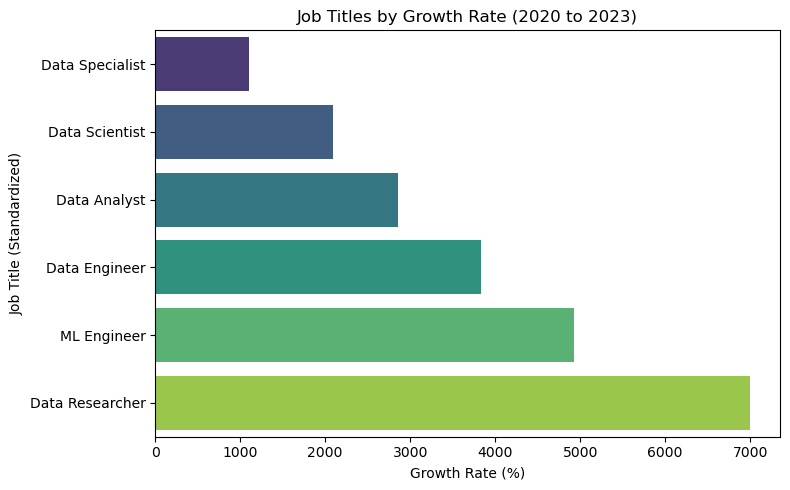

In [23]:
# Count job occurrences by year and standardized job title
job_year_counts = df.groupby(['work_year', 'job_title_standardized']).size().unstack(fill_value=0)

# Extract job counts for 2020 and 2023
job_2020 = job_year_counts.loc[2020]
job_2023 = job_year_counts.loc[2023]

# Keep only jobs that existed in 2020 (to avoid divide-by-zero)
valid_jobs = job_2020[job_2020 > 0].index

# Compute growth rate
growth_rate = ((job_2023[valid_jobs] - job_2020[valid_jobs]) / job_2020[valid_jobs]) * 100

# Combine results into a DataFrame
growth_df = pd.DataFrame({
    '2020 Count': job_2020[valid_jobs],
    '2023 Count': job_2023[valid_jobs],
    'Growth Rate (%)': growth_rate.round(2)
}).sort_values(by='Growth Rate (%)', ascending=False)

# Get growth jobs and sort them for plotting
top_growth = growth_df.sort_values(by='Growth Rate (%)', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_growth,
    x='Growth Rate (%)',
    y=top_growth.index,
    hue=top_growth.index,
    palette='viridis'
)
plt.title("Job Titles by Growth Rate (2020 to 2023)")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Job Title (Standardized)")
plt.tight_layout()
plt.show()

**Result & Insight:**
Overall, data-related roles showed a growth trend from 2020 to 2023, indicating continued strength in the job market and strong future potential for the data field.

## D. Cross-Border Employment

### Question 19: Is cross-border remote hiring common in the data field? (i.e., employee residence differs from company location)

In [24]:
# Create a column to indicate cross-border employment 
# (if employee residence ≠ company location, it's considered cross-border)
df['is_cross_country'] = df['employee_residence'] != df['company_location']

# Calculate the proportion of cross-border vs. local employment
# normalize=True converts counts to percentages; rename replaces boolean values with readable labels
cross_country_ratio = (
    df['is_cross_country']
    .value_counts(normalize=True)                # Calculate ratio (True/False distribution)
    .rename({True: 'Cross-Border', False: 'Local'})  # Replace labels
    .round(3) * 100                              # Round and convert to percentage format
)

cross_country_ratio

is_cross_country
Local           98.1
Cross-Border     1.9
Name: proportion, dtype: float64

**Result & Insight:**
Cross-border employment is still not widespread, possibly due to factors such as tax regulations, time zone challenges, and data security concerns.

### Question 20: In which countries is cross-border employment most common?
`Cross-Border Hire Ratio (%) = ( Number of Cross-Border Hires / Total Hires ) * 100`

- (DE)  Germany
- (CA)  Canada
- (GB)  United Kingdom
- (IN)	India
- (ES)  Spain
- (US)  United States

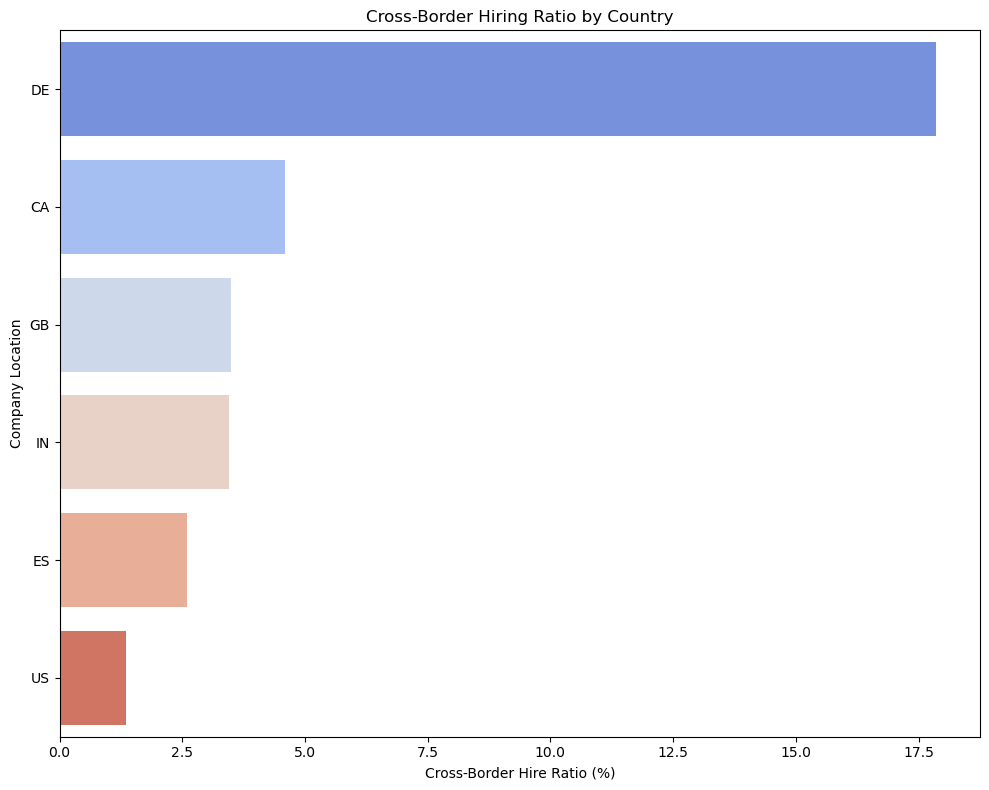

In [25]:
# Calculate total hires and cross-border hires per country
cross_country_stats = df.groupby('company_location')['is_cross_country'].agg(['count', 'sum'])

# Compute the cross-border hire ratio (%) and round to 2 decimal places
cross_country_stats['cross_hire_ratio'] = (cross_country_stats['sum'] / cross_country_stats['count'] * 100).round(2)

# Step 3: Sort countries by cross-border ratio in descending order
cross_country_stats_sorted = cross_country_stats.sort_values(by='cross_hire_ratio', ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(
    data=cross_country_stats_sorted,
    x='cross_hire_ratio',               # X-axis: percentage
    y=cross_country_stats_sorted.index, # Y-axis: country
    hue=cross_country_stats_sorted.index, 
    palette='coolwarm'               
)

# Add chart title and axis labels
plt.title("Cross-Border Hiring Ratio by Country")
plt.xlabel("Cross-Border Hire Ratio (%)")
plt.ylabel("Company Location")
plt.tight_layout()
plt.show()

**Result & Insight:**
While cross-border hiring remains uncommon overall, countries such as Germany (DE) and Canada (CA) stand out with relatively higher cross-border remote employment rates, indicating a more flexible approach to remote work in their data-related job markets.

## Summary
* This analysis focused on data-related positions from 2020 to 2023, exploring aspects such as job title distribution, salary trends, remote work ratios, cost of living adjustments, and cross-border employment. Overall, data roles have shown consistent growth in recent years, with Data Engineer, Data Analyst, and Data Scientist experiencing the most significant increases—highlighting strong market demand for data processing and application talent.

* Although data jobs are well-suited for remote work from a technical perspective, cross-border employment remains relatively rare, accounting for only about 2% of all cases—primarily in countries like Germany and Canada. This indicates that while companies are open to remote work, they still tend to prefer hiring domestically.

* Additionally, after adjusting salaries for cost of living differences, country rankings shifted significantly. This underscores the importance of incorporating cost-of-living indices to ensure fair comparisons of real income.

* As the pandemic has eased, the proportion of fully remote work has gradually declined, with companies returning to hybrid or in-person work models.

* In conclusion, the data field continues to show strong momentum and promising growth potential in the global job market.